In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


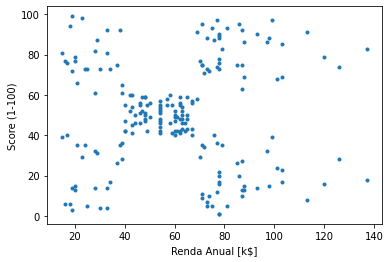

In [8]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='.')
plt.xlabel('Renda Anual [k$]')
plt.ylabel('Score (1-100)')
plt.show()

In [24]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [40]:
modelo_kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = modelo_kmeans.fit_predict(X)
print(y_kmeans)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 3 4 1 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [41]:
print(X[y_kmeans == 0])

    Annual Income (k$)  Spending Score (1-100)
0                   15                      39
2                   16                       6
4                   17                      40
6                   18                       6
8                   19                       3
10                  19                      14
12                  20                      15
14                  20                      13
16                  21                      35
18                  23                      29
20                  24                      35
22                  25                       5
24                  28                      14
26                  28                      32
28                  29                      31
30                  30                       4
32                  33                       4
34                  33                      14
36                  34                      17
38                  37                      26
40           

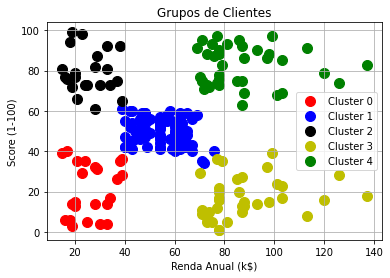

In [42]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']

for k in range(k_grupos):
  cluster = X[y_kmeans == k]
  plt.scatter(
    cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
    s=100, c=cores[k], label=f'Cluster {k}'
  )

plt.title('Grupos de Clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()